In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

#### 1. iris 데이터를 읽으세요

In [2]:
from sklearn.datasets import load_iris

iris_ = load_iris()
iris_X = pd.DataFrame(iris_.data, columns=iris_.feature_names)
iris_y = pd.DataFrame(iris_.target, columns=['target'])
iris = pd.concat([iris_X, iris_y], axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 2. 각 컬럼별 boxplot을 그려보세요

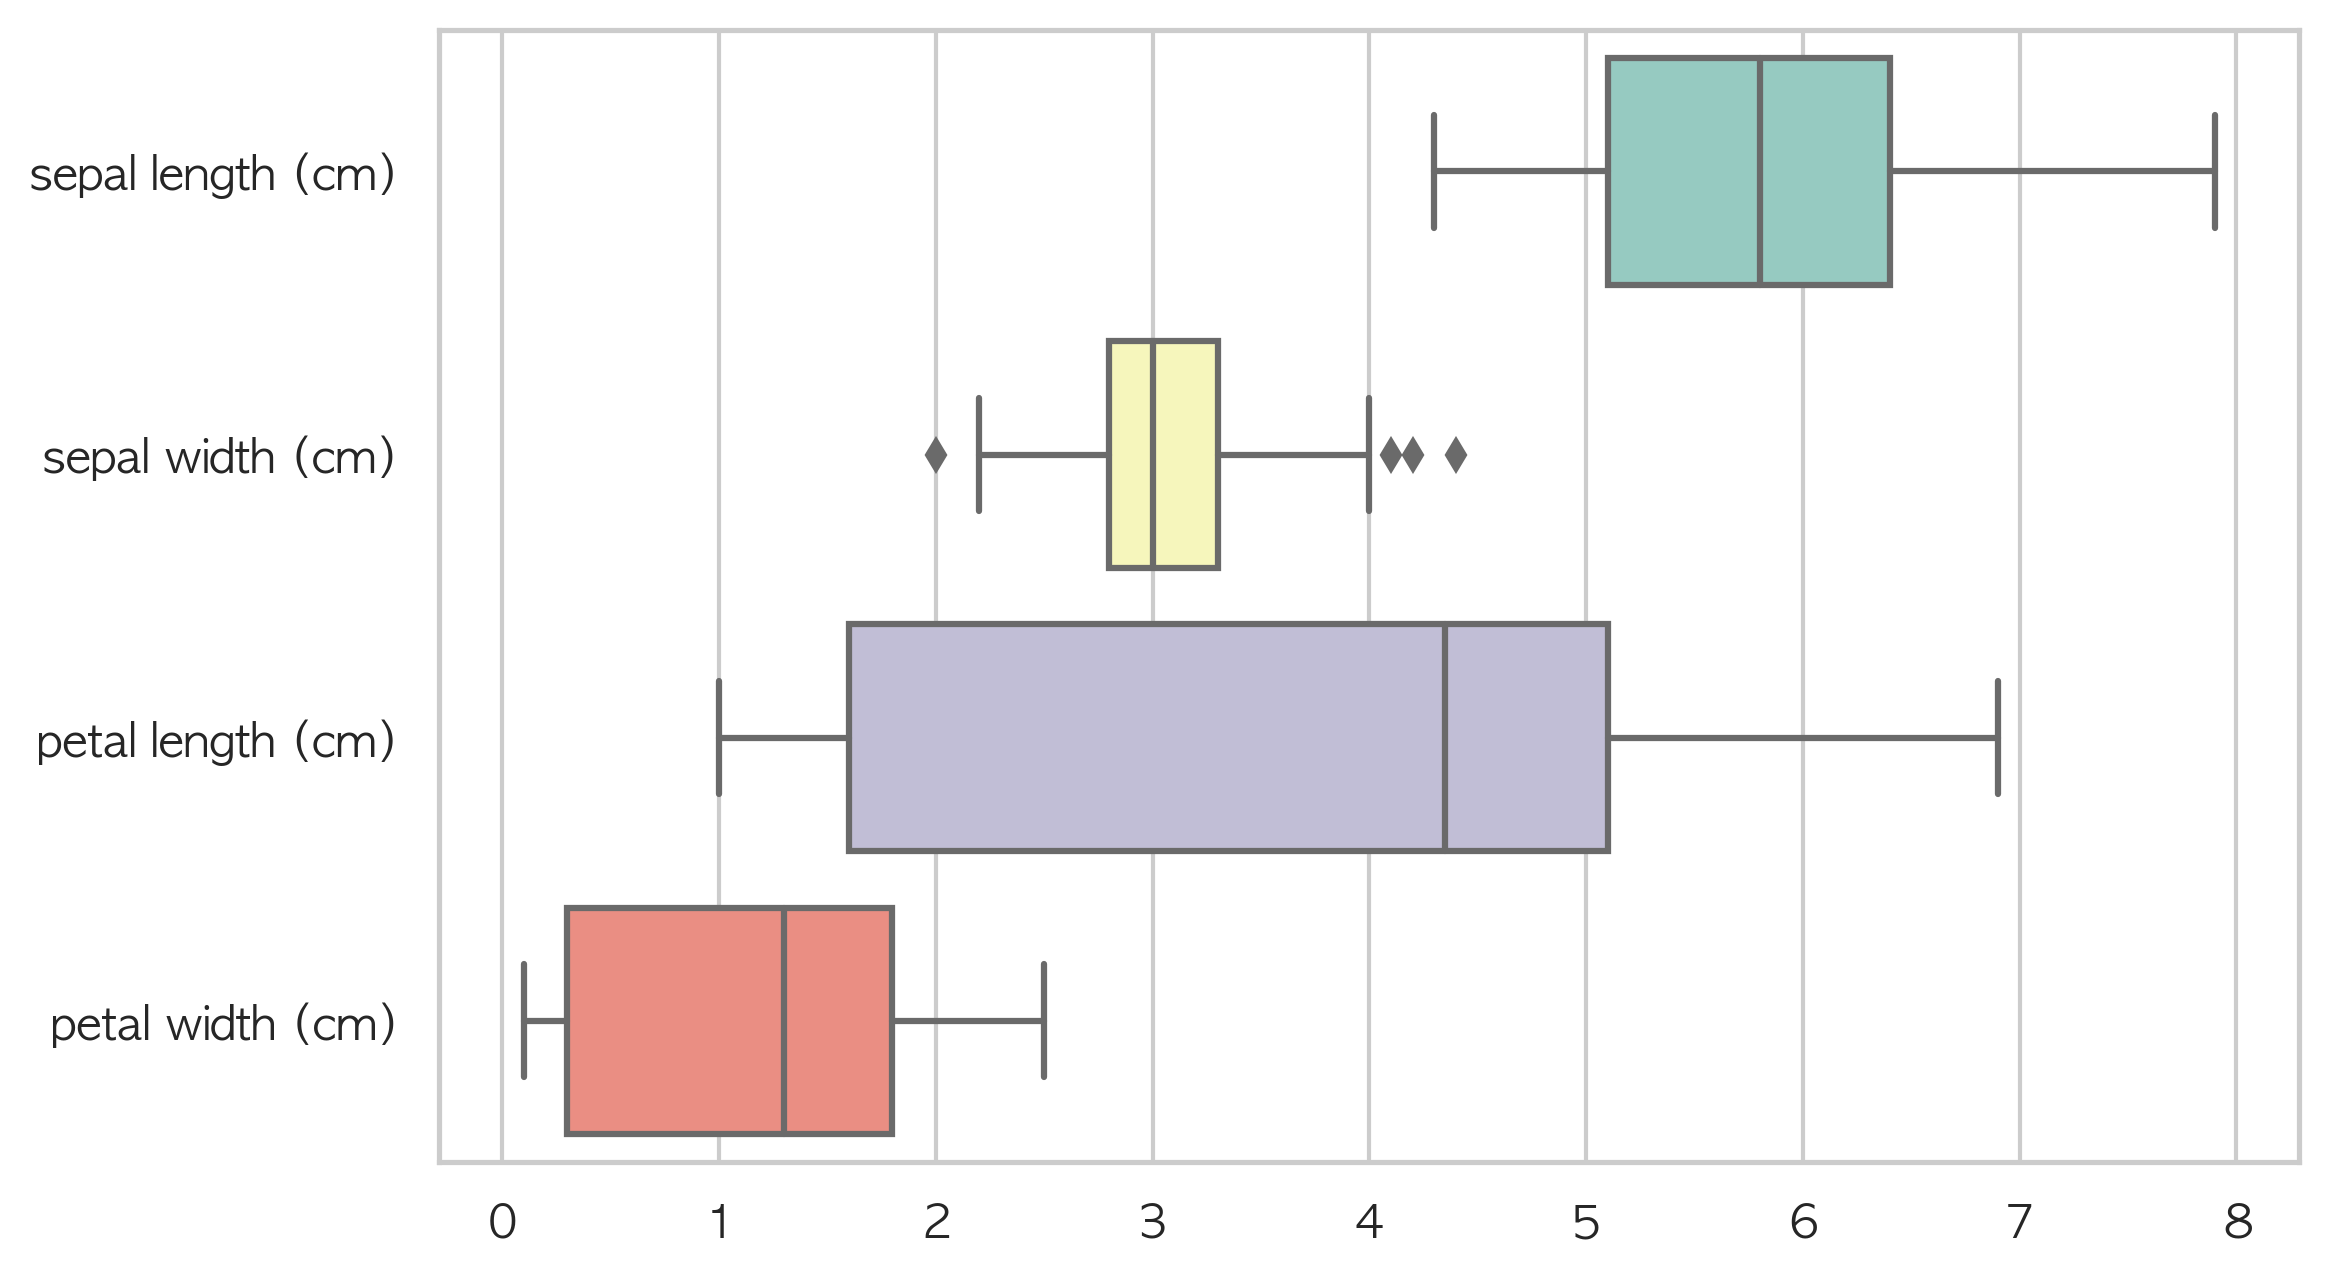

In [3]:
ax = sns.boxplot(data=iris.iloc[:, :4], orient='h', palette="Set3")
# plt.ylabel([iris_.feature_names])
# ax.set_xticks(['sepal length', 'sepal width', 'petal length', 'petal width'])

#### 3. StandardScaler를 적용해주세요

In [4]:
iris_.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(iris_X)
iris_sc = sc.transform(iris_X)
iris_sc_df = pd.DataFrame(iris_sc, columns=iris_.feature_names)
iris_sc_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


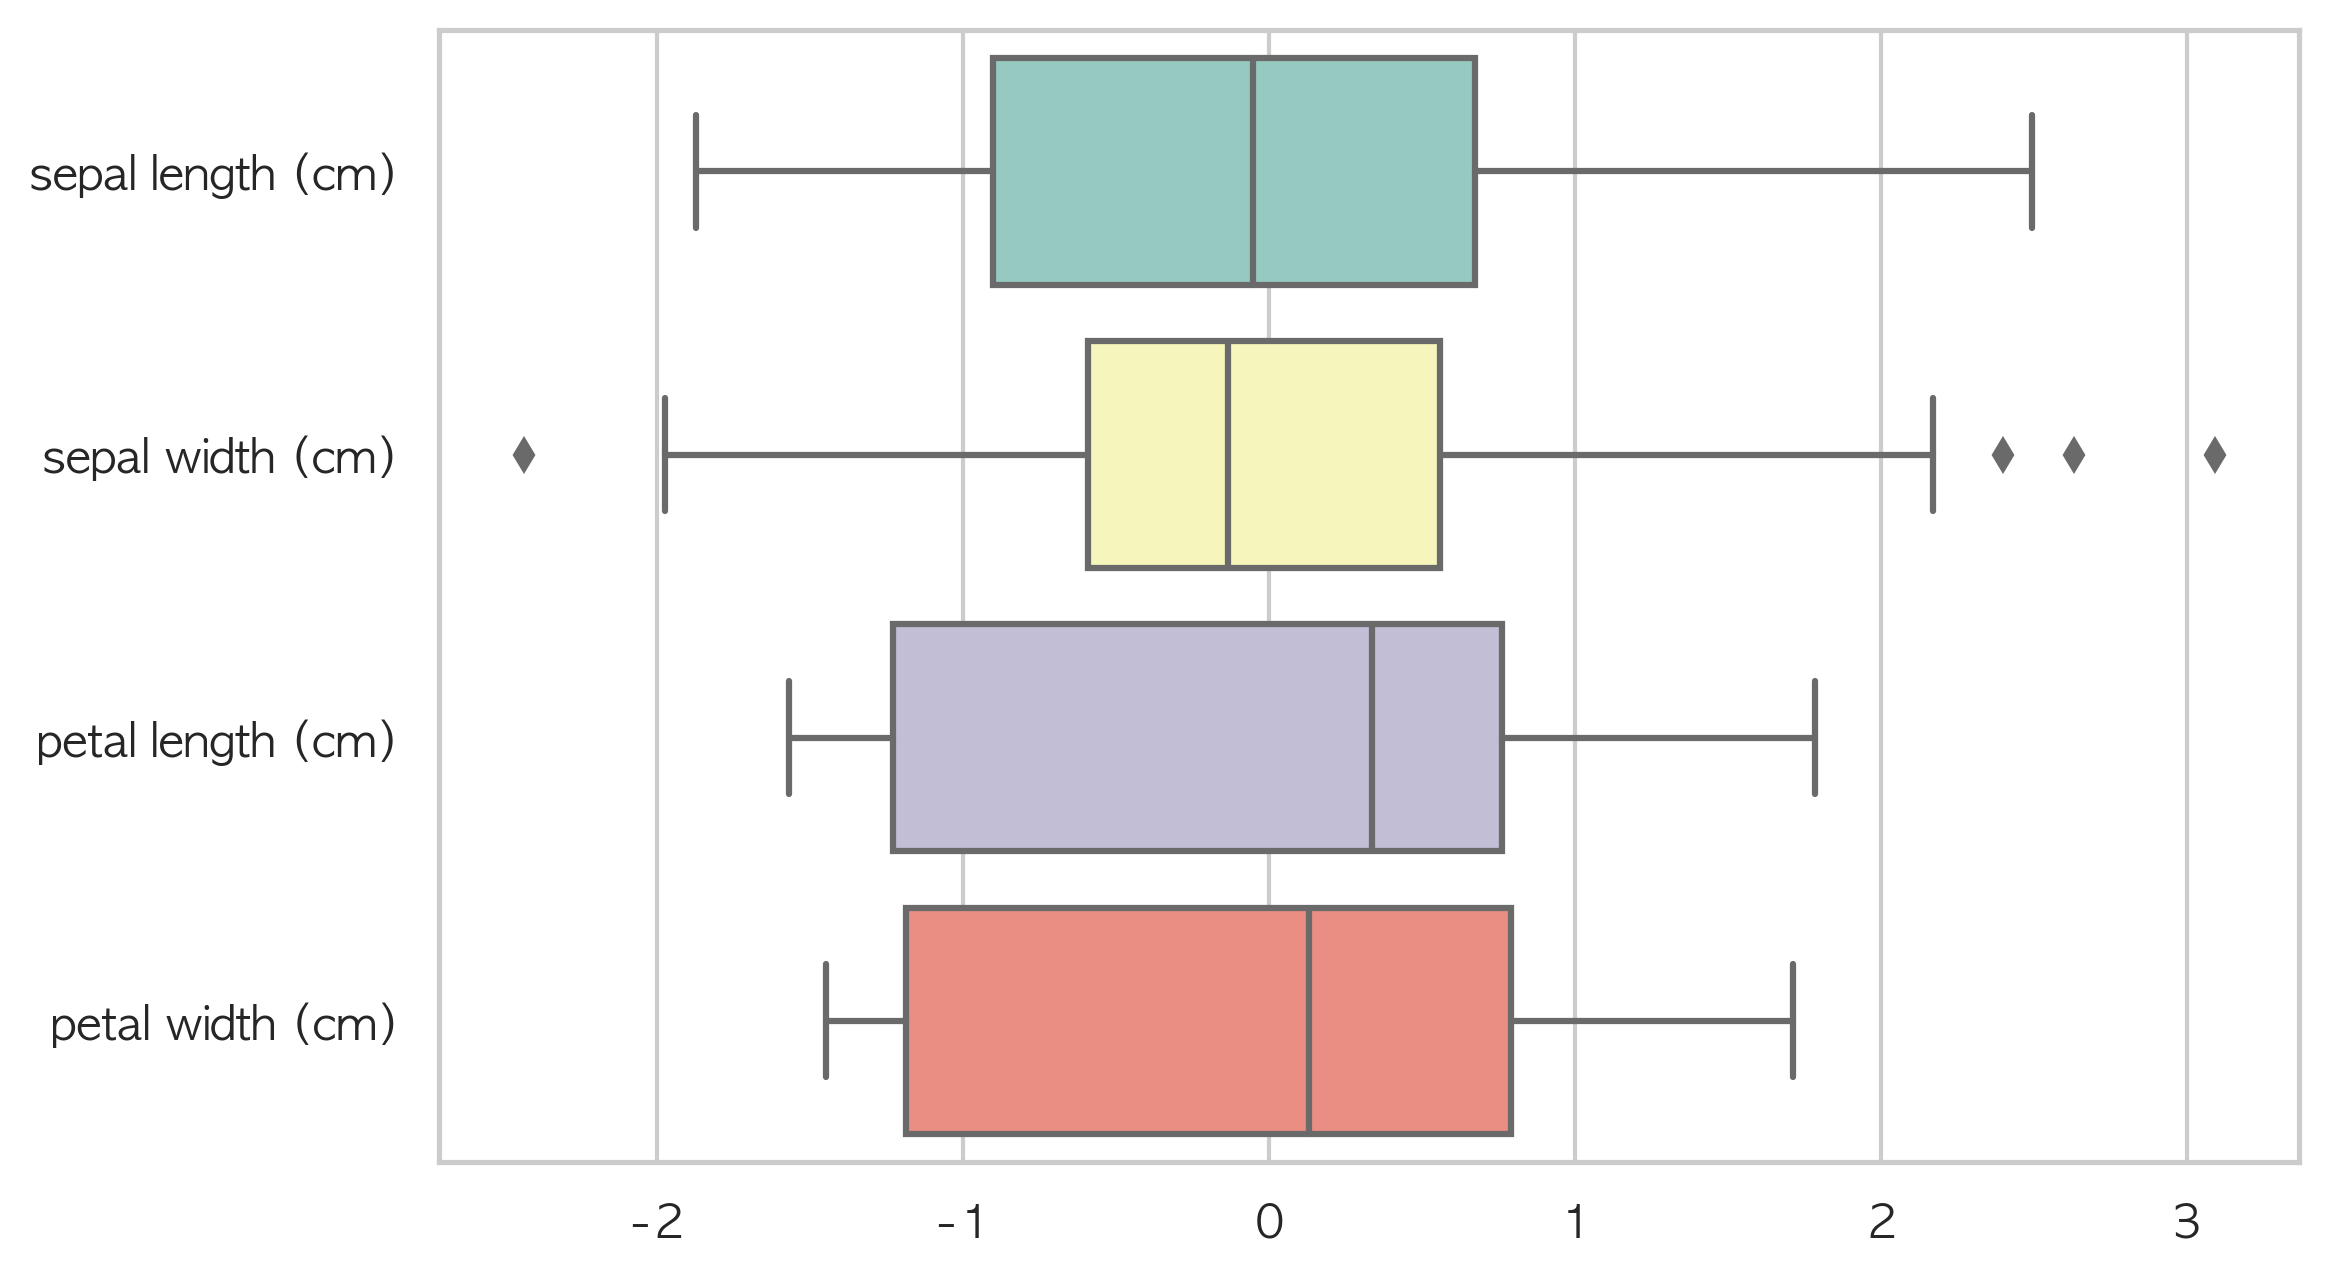

In [6]:
ax = sns.boxplot(data=iris_sc_df, orient='h', palette="Set3")

#### 4. 훈련용과 테스트용으로 데이터를 나눠주세요

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=15, stratify=iris_y)

#### 5. 모델이 정해져서 train 데이터를 라벨과 함께 받아 학습하고, test 데이터를 받아 predict 결과를 반환하는 함수를 만들어 두세요

In [8]:
def get_predict(models, X_train, X_test, y_train):
    result = models.fit(X_train, y_train)
    predict = result.predict(X_test)
    
    return predict

#### 6. predict 결과를 받아 accuracy를 계산하는 함수를 만들어 두세요

In [9]:
def get_accuracy(predict, y_test):
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, predict)
    
    return accuracy

#### 7. LGBM

In [10]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=400)

predict_lgbm = get_predict(lgbm, X_train, X_test, y_train)
accuracy_lgbm = get_accuracy(predict_lgbm, y_test)
accuracy_lgbm

0.9333333333333333

#### 8. RandomForest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=13, n_estimators=100, max_depth=4)

predict_rf = get_predict(rf, X_train, X_test, y_train)
accuracy_rf = get_accuracy(predict_rf, y_test)
accuracy_rf

0.9111111111111111

#### 9. DecisionTree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=13)

predict_dt = get_predict(dt, X_train, X_test, y_train)
accuracy_dt = get_accuracy(predict_dt, y_test)
accuracy_dt

0.9555555555555556

#### 10. LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13, solver='liblinear')

predict_lg = get_predict(lr, X_train, X_test, y_train)
accuracy_lg = get_accuracy(predict_lg, y_test)
accuracy_lg

0.9777777777777777

#### 11. 7번부터 10번까지 test accuracy를 pandas data frame으로 정리해보세요

In [14]:
models = ['LGBM', 'RandomForest', 'DecisionTree', 'LogisticRegression']
accuracies = [accuracy_lgbm, accuracy_rf, accuracy_dt, accuracy_lg]

accuracy_df = pd.DataFrame(accuracies, index=models, columns=['accuracy']).T
accuracy_df

,LGBM,RandomForest,DecisionTree,LogisticRegression
accuracy,0.933333,0.911111,0.955556,0.977778
